In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
traffic_pd = pd.read_csv('../../Data/afterPreprocess.csv')
traffic_pd

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,5110577,430660,430766,1,2018-01-01,03:44:00,Unclassified,U,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Vehicle or pillion passenger,Slight,Male,23
1,5110577,430660,430766,1,2018-01-01,03:44:00,Unclassified,U,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Driver or rider,Slight,Male,23
2,5110577,430660,430766,1,2018-01-01,03:44:00,Unclassified,U,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Vehicle or pillion passenger,Serious,Male,33
3,5111304,431442,432717,2,2018-01-01,13:35:00,A,A63,Dry,Daylight: street lights present,Fine without high winds,E08000035,Car,Driver or rider,Slight,Female,57
4,5111365,429509,431308,2,2018-01-01,14:21:00,Unclassified,U,Wet / Damp,Daylight: street lights present,Raining without high winds,E08000035,Car,Vehicle or pillion passenger,Slight,Male,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,6CU0181,442094,434619,1,2019-12-30,04:22:00,Motorway,M1,Wet / Damp,Darkness: street lights present and lit,Fine with high winds,E08000035,Car,Driver or rider,Slight,Male,27
3896,6CU0363,423019,437653,1,2019-12-30,10:00:00,A,A65,Frost / Ice,Daylight: street lights present,Fine without high winds,E08000035,Motorcycle over 500cc,Driver or rider,Serious,Male,36
3897,6CV1518,421466,433999,3,2019-12-31,16:40:00,A,A647,Dry,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Driver or rider,Slight,Male,41
3898,6CV0723,436853,442515,2,2019-12-31,13:40:00,A,A58,Dry,Daylight: street lights present,Fine without high winds,E08000035,Pedal cycle,Driver or rider,Serious,Male,59


# Độ tuổi của các đối tượng bị tai nạn

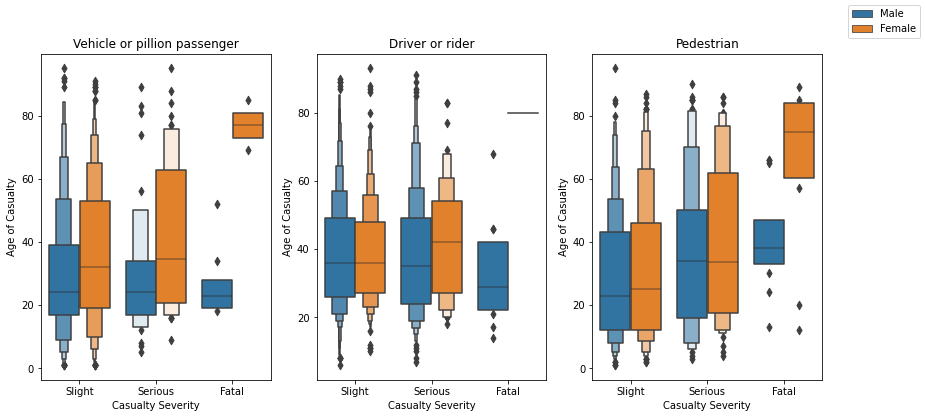

In [43]:
casualty_class = traffic_pd['Casualty Class'].unique()

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
# fig.suptitle('Biểu đồ thể hiện độ tuổi của các đối tượng bị tai nạn theo giới tính')

for i in range(len(casualty_class)):
    sns.boxenplot(data=traffic_pd[traffic_pd['Casualty Class'] == casualty_class[i]],
                x='Casualty Severity', y='Age of Casualty', hue='Sex of Casualty', ax=axes[i])
    axes[i].get_legend().remove()
    axes[i].set_title(casualty_class[i])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels)

plt.show()

Có thể thấy trong cả 3 đối tượng bị tai nạn giao thông, độ tuổi trung bình của những nạn nhân nam thường thấp hơn so với nữ.
- Với mức độ nhẹ và nghiêm trọng:
    - Nam trong khoảng 20 - 40 tuổi thường bị tai nạn nhiều nhất
    - Với nữ thì trong khoảng 20 - 60 tuổi.
- Đặc biệt với các trường hợp người điều khiển phương tiện tử vong: nạn nhân nam vừa trẻ hơn và nhiều hơn so với nạn nhân nữ, có trường hợp trẻ nhất ~10 tuổi.

    $\rightarrow$ Điều này có thể do người điều khiển bị phương tiện khác gây tai nạn hay điều khiển phương tiện khi chưa đủ tuổi, không an toàn và gây tai nạn?
    
Ngược lại việc có nhiều người cao tuổi bị tai nạn là nữ hơn so với nam cũng có thể đặt nghi vấn như trên

# Liên hệ giữa các con đường và điều kiện chiếu sáng với các vụ tai nạn

In [60]:
trafficSF_pd = traffic_pd[traffic_pd['Casualty Severity'] != 'Slight']
trafficSF_pd

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
2,5110577,430660,430766,1,2018-01-01,03:44:00,Unclassified,U,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Vehicle or pillion passenger,Serious,Male,33
9,5111524,425627,438001,2,2018-01-01,15:54:00,A,A6120,Dry,Daylight: street lights present,Fine without high winds,E08000035,Car,Driver or rider,Serious,Male,84
12,5110140,433820,433502,1,2018-01-01,00:45:00,Unclassified,U,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Driver or rider,Serious,Male,38
14,5211823,428098,436746,2,2018-01-02,07:50:00,B,B6157,Dry,Daylight: street lights present,Fine without high winds,E08000035,Pedal cycle,Driver or rider,Serious,Male,44
18,5211579,431213,426513,3,2018-01-02,19:23:00,Motorway,M62,Dry,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Driver or rider,Serious,Male,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,6CM1165,428440,428625,4,2019-12-22,16:50:00,A,A658,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Vehicle or pillion passenger,Serious,Female,43
3884,6CM1165,428440,428625,4,2019-12-22,16:50:00,A,A658,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Vehicle or pillion passenger,Serious,Female,9
3894,6CT0238,430040,434040,1,2019-12-29,02:20:00,Unclassified,U,Dry,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Pedestrian,Serious,Male,21
3896,6CU0363,423019,437653,1,2019-12-30,10:00:00,A,A65,Frost / Ice,Daylight: street lights present,Fine without high winds,E08000035,Motorcycle over 500cc,Driver or rider,Serious,Male,36


In [52]:
traffic_pd['Lighting Conditions'].unique()

array(['Darkness: street lights present and lit',
       'Daylight: street lights present',
       'Darkness: street lighting unknown',
       'Darkness: no street lighting',
       'Darkness: street lights present but unlit'], dtype=object)

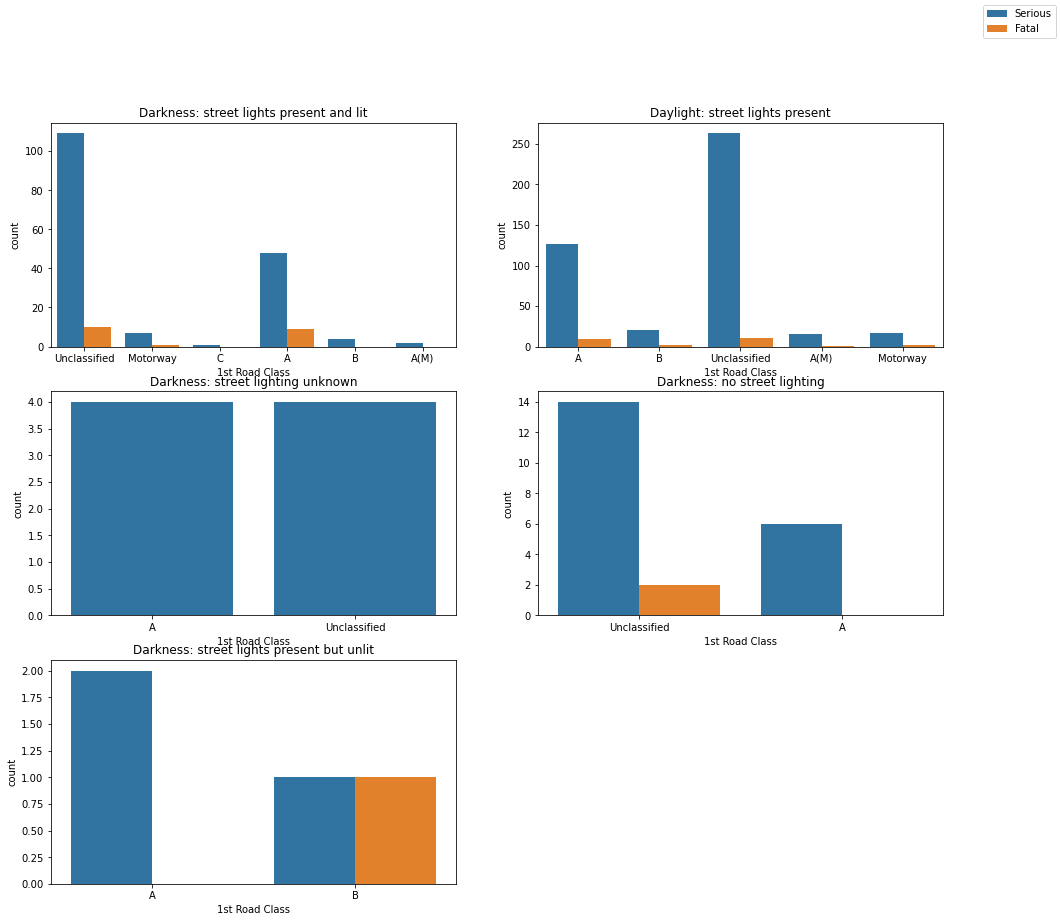

In [68]:
light_conditions = traffic_pd['Lighting Conditions'].unique()
figrows = 3; figcols = 2

fig, axes = plt.subplots(figrows, figcols, figsize=(16, 14))
for i in range(len(road_surfaces)):
    sns.countplot(data=trafficSF_pd[trafficSF_pd['Lighting Conditions'] == light_conditions[i]], x='1st Road Class',
                 hue='Casualty Severity', ax=axes[i // figcols, i % figcols])
    axes[i // figcols, i % figcols].get_legend().remove()
    axes[i // figcols, i % figcols].set_title(light_conditions[i])
    
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.delaxes(axes[-1, -1])

plt.show()

Ta thấy trong hầu hết các điều kiện ánh sáng, những đường nội đô - không phân loại -  có số vụ tai nạn giao thông mức độ nghiêm trọng và tử vong cao hơn nhiều so với những loại đường khác, cao hơn cả đường loại A với lưu lượng giao thông lớn hơn.

Có thể tình hình an toàn giao thông ở những đường nhỏ không được quan tâm nhiều dẫn đến mất an toàn và số vụ tai nạn cao.

In [67]:
plt.close('all')